In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns

sc._settings.ScanpyConfig(n_jobs=-1)

In [2]:
# Specify the path to your Helvetica Neue Regular font file
helvetica_neue_path = "/home/mstier/.local/share/fonts/HelveticaNeue-Regular.ttf"

# Create a FontProperties object using the font path
prop_neue = fm.FontProperties(fname=helvetica_neue_path)

# Get the font name from FontProperties
helvetica_neue_name = prop_neue.get_name()

# Define custom context for font sizes and line thickness using Seaborn
custom_context = {
    'font.size': 7,                    # General font size for the plot
    'axes.labelsize': 7,               # Font size for axis labels
    'axes.titlesize': 7,               # Font size for titles
    'legend.fontsize': 7,              # Font size for legend
    'axes.linewidth': 0.6,             # Line width for axes spines
    'grid.linewidth': 0.6,             # Line width for grid lines
    'lines.linewidth': 0.6,            # Line width for plot lines
    'lines.markersize': 3,             # Size of markers in scatter/line plots
    'patch.linewidth': 0.6,            # Line width for boxplot edges
    'xtick.major.size': 3,             # Length of major ticks on x-axis
    'ytick.major.size': 3,             # Length of major ticks on y-axis
    'xtick.labelsize': 7,              # Font size for x-tick labels
    'ytick.labelsize': 7,              # Font size for y-tick labels
    'legend.title_fontsize': 7,        # Font size for legend title
}

# Define custom style for aesthetic elements like background, grid, and spines using Seaborn
custom_style = {
    'axes.facecolor': 'white',         # Background color of the axes
    'axes.edgecolor': 'black',         # Color of the border around the plot
    'axes.grid': False,                # Disable gridlines
    'grid.color': '#EAEAEA',           # Color of grid lines
    'grid.linestyle': '--',            # Style of the grid lines (dashed)
    'xtick.color': 'black',            # Color of x-axis tick labels
    'ytick.color': 'black',            # Color of y-axis tick labels
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.direction': 'out',          # Direction of x-axis ticks
    'ytick.direction': 'out',          # Direction of y-axis ticks
    'axes.spines.left': True,          # Show the left spine (border)
    'axes.spines.bottom': True,        # Show the bottom spine (border)
    'axes.spines.right': False,        # Hide the right spine
    'axes.spines.top': False,          # Hide the top spine
}

# Use set_theme and pass rc with font settings
sns.set_theme(
    context=custom_context,
    style=custom_style,
    rc={
        'font.family': 'sans-serif',                   # Set family to sans-serif
        'font.sans-serif': [helvetica_neue_name],      # Specify Helvetica Neue as the sans-serif font
        'font.size': 7,                                # General font size for the plot
        'axes.labelsize': 7,                           # Font size for axis labels
        'axes.titlesize': 7,                           # Font size for titles
        'legend.fontsize': 7,                          # Font size for legend
        'xtick.labelsize': 7,                          # Font size for x-tick labels
        'ytick.labelsize': 7                           # Font size for y-tick labels
    }
)

plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# Set the base output directory for all figures
output_dir = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/'

In [4]:
# Directory containing all CellBender output files
data_dir = "/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/"

# File pattern for all samples (0001 to 0048)
file_pattern = "10069-MS-{:04d}_output_filtered.h5"

# List to store data for each sample
all_data = []

# Loop through sample files (0001 to 0048)
for i in range(1, 49):  # 1 to 48
    file_path = os.path.join(data_dir, file_pattern.format(i))
    if os.path.exists(file_path):
        print(f"Processing {file_path}")
        # Load the CellBender output file
        adata = sc.read_10x_h5(file_path)
        # Add a column for sample identifier
        adata.obs["Sample"] = f"Sample_{i:04d}"
        # Compute nFeature_RNA (number of unique genes)
        adata.obs["nFeature_RNA"] = (adata.X > 0).sum(axis=1).A1  # Count non-zero genes
        all_data.append(adata.obs[["Sample", "nFeature_RNA"]])
    else:
        print(f"File not found: {file_path}")

# Combine data for all samples into a single DataFrame
combined_df = pd.concat(all_data)

Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0001_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0002_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0003_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0004_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0005_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0006_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0007_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFig

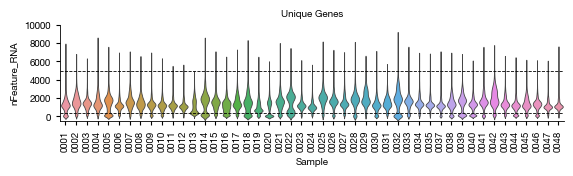

In [6]:
# Exclude Sample_0036 from the dataset
filtered_df = combined_df[~combined_df["Sample"].str.contains("Sample_0036")]

plt.figure(figsize=(6.5, 1.25))  # Slightly narrower and shorter

sns.violinplot(
    x=filtered_df["Sample"].str.replace("Sample_", ""),  # Remove "Sample_" prefix
    y="nFeature_RNA", 
    data=filtered_df, 
    inner=None,  # Remove individual dots
    scale="width", 
    linewidth=0.6
)

# Add dashed lines at y=400 and y=5000
plt.axhline(400, color='black', linestyle='--', linewidth=0.6)
plt.axhline(5000, color='black', linestyle='--', linewidth=0.6)

# Customize y-axis ticks and labels
plt.yticks(range(0, 10001, 2000))
plt.ylim(-500, 10000)
plt.ylabel("nFeature_RNA")

# Customize labels
plt.xticks(rotation=90, ha='center')
plt.title("Unique Genes")

# Save and display the plot
plt.savefig("nFeature_violin_plot.svg")
plt.show()

Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0001_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0002_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0003_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0004_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0005_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0006_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/10069-MS-0007_output_filtered.h5
Processing /home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFig

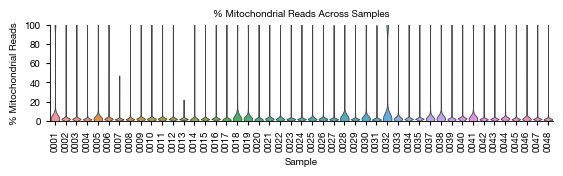

In [26]:
# Directory containing all CellBender output files
data_dir = "/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/ExtDataFigure3/CellBender Output/"

# File pattern for all samples (0001 to 0048)
file_pattern = "10069-MS-{:04d}_output_filtered.h5"

# List to store data for each sample
all_data = []

# Loop through sample files (0001 to 0048)
for i in range(1, 49):  # 1 to 48
    file_path = os.path.join(data_dir, file_pattern.format(i))
    if os.path.exists(file_path):
        print(f"Processing {file_path}")
        # Load the CellBender output file
        adata = sc.read_10x_h5(file_path)
        # Add a column for sample identifier
        adata.obs["Sample"] = f"Sample_{i:04d}"
        
        # Compute nFeature_RNA if not already present
        if "nFeature_RNA" not in adata.obs.columns:
            adata.obs["nFeature_RNA"] = (adata.X > 0).sum(axis=1).A1  # Count non-zero genes
        
        # Calculate % mito
        mt_genes = adata.var_names.str.startswith('MT-')  # Adjust prefix if needed
        adata.obs["percent.mt"] = (adata[:, mt_genes].X.sum(axis=1).A1 / adata.X.sum(axis=1).A1) * 100
        
        # Debugging: Ensure these columns exist
        if "percent.mt" in adata.obs.columns and "nFeature_RNA" in adata.obs.columns:
            sample_data = adata.obs[["Sample", "nFeature_RNA", "percent.mt"]]
            all_data.append(sample_data)
        else:
            print(f"Missing required columns for Sample_{i:04d}")
    else:
        print(f"File not found: {file_path}")

# Combine data for all samples into a single DataFrame
combined_df = pd.concat(all_data)

# Exclude Sample_0036 from the dataset
filtered_df = combined_df[~combined_df["Sample"].str.contains("Sample_0036")]

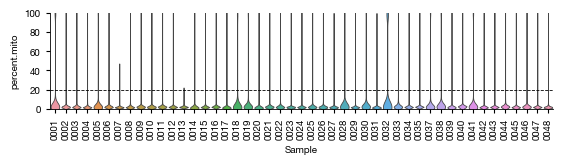

In [39]:
# Plot the violin plot for % mito
plt.figure(figsize=(6.5, 1.25))

sns.violinplot(
    x=filtered_df["Sample"].str.replace("Sample_", ""),  # Remove "Sample_" prefix
    y="percent.mt", 
    data=filtered_df, 
    inner=None,  # Remove individual dots inside the violins
    scale="width", 
    linewidth=0.6
)

# Add dashed line at y=20
plt.axhline(20, color='black', linestyle='--', linewidth=0.6)

# Customize y-axis ticks and labels
plt.yticks(range(0, 101, 20))
plt.ylim(0, 100)
plt.ylabel("percent.mito")

# Customize x-axis labels
plt.xticks(rotation=90, ha='center')

# Save and display the plot
plt.savefig("percentmito_violin_plot.svg")
plt.show()

In [40]:
adata = sc.read_h5ad('/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure4/5kHVG-revised-sample-list_128-30-2/10069-MS_5kHVG-revised_UMAP-label-filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 644147 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.ribosomal', 'percent.heme', 'percent.mt', 'percent_mito_filtered', 'percent_feature_filtered', 'percent_doublets', 'SCARAB_ID', 'Batch', 'Age', 'Biologic_Sex', 'ICU', 'Group', 'Source', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'highlight', 'leiden-sub', 'celltype_coarse', 'celltype_fine', 'umap_x', 'umap_y', 'group_density'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Batch_colors', 'Biologic_Sex_colors', 'Group_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_coarse_colors', 'celltype_fine_colors', 'group_density_params', 'highlight_colors', 'hvg', 'leiden', 'leiden-sub_colors', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scVI_normalized'
    ob

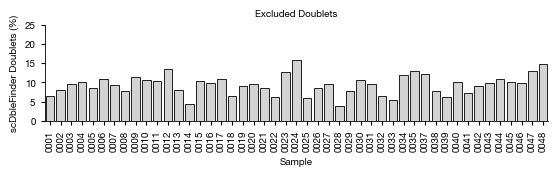

In [46]:
# Set up the figure dimensions
fig, ax = plt.subplots(figsize=(6.5, 1.25))

# Plot the bar graph with a lighter grey color
sns.barplot(
    data=percent_doublets_means,
    x=percent_doublets_means["orig.ident"].str[-4:],  # Keep only the last 4 digits of the sample name
    y="percent_doublets", 
    color='#D3D3D3',
    edgecolor='black', 
    linewidth=0.6,
    ax=ax
)

# Customize y-axis limits and tick frequency
y_max = 25  # Adjust y-axis maximum limit here
y_tick_interval = 5  # Adjust tick frequency here
ax.set_ylim(0, y_max)
ax.set_yticks(range(0, y_max + 1, y_tick_interval))

# Customize the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylabel("scDbleFinder Doublets (%)")
plt.xlabel("Sample")
plt.title("Excluded Doublets",)

# Apply borders to all four sides
for spine in ax.spines.values():
    spine.set_linewidth(0.6)

# Save the plot
plt.savefig("percent_doublets_barplot.svg")
plt.show()